# Analysing Deaf Speakers

In [20]:
# some magic so that the notebook will reload external python modules;
# see https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os
import subprocess
import sys
import numpy as np
import matplotlib.pyplot as plt
import string
from copy import copy
import gc
import glob
import json
import string
import math
import pandas as pd
%matplotlib inline

import cv2
import torch

In [22]:
sys.path.append(os.path.abspath('..'))

In [23]:
from data_processing.video_utils import seconds_to_hhmmss
from analyse_utils import get_speaker_df, get_word_frequencies, draw_word_cloud, aggregate_errors, print_most_frequent_errors

In [24]:
def process_text(text):
    punctuation = string.punctuation.replace("'", "")
    text = text.translate(str.maketrans('', '', punctuation))
    text = text.upper()
    return text

## Benny

### Analysing clips

In [5]:
data_dir = "../datasets/deaf-youtube/benny"
clips_dir = os.path.join(data_dir, f"sentence_clips")

clip_files = glob.glob(os.path.join(clips_dir, "*/clips.json"))
print(f"{len(clip_files) = }")
print(f"{clip_files = }")

len(clip_files) = 5
clip_files = ['../datasets/deaf-youtube/benny/sentence_clips/laRIaxM82dw/clips.json', '../datasets/deaf-youtube/benny/sentence_clips/JaB9BT09nSE/clips.json', '../datasets/deaf-youtube/benny/sentence_clips/jSk5T2aGqpM/clips.json', '../datasets/deaf-youtube/benny/sentence_clips/dyb71EMatR0/clips.json', '../datasets/deaf-youtube/benny/sentence_clips/XlEO7pWAc84/clips.json']


In [6]:
sentence_durations = []
sentence_lengths = []
sentence_texts = []

for clip_file_idx, clip_file in enumerate(clip_files):
    print(f"{clip_file = }")
    tracks_clips = json.load(open(clip_file))
    for track_clips in tracks_clips:
        for clip in track_clips['clips']:
            start_time = clip['start']
            end_time = clip['end']
            sentence = process_text(clip['sentence'])
            duration = end_time - start_time
            length = len(sentence.split(' '))
            sentence_durations.append(duration)
            sentence_lengths.append(length)
            sentence_texts.append(sentence)
    # break

sentence_durations = np.array(sentence_durations)
sentence_lengths = np.array(sentence_lengths)
print(len(sentence_durations))
print(len(sentence_lengths))

clip_file = '../datasets/deaf-youtube/benny/sentence_clips/laRIaxM82dw/clips.json'
clip_file = '../datasets/deaf-youtube/benny/sentence_clips/JaB9BT09nSE/clips.json'
clip_file = '../datasets/deaf-youtube/benny/sentence_clips/jSk5T2aGqpM/clips.json'
clip_file = '../datasets/deaf-youtube/benny/sentence_clips/dyb71EMatR0/clips.json'
clip_file = '../datasets/deaf-youtube/benny/sentence_clips/XlEO7pWAc84/clips.json'
398
398


In [7]:
min_idx = np.where(sentence_lengths == sentence_lengths.min())
min_idx = min_idx[0]
print(min_idx)

for min_id in min_idx:
    print(f"{min_id = } | Sentence = {sentence_texts[min_id]} | duration = {sentence_durations[min_id]}")

[  7  18  49 145 157 397]
min_id = 7 | Sentence = OOOO | duration = 2.0
min_id = 18 | Sentence = HMM | duration = 2.0
min_id = 49 | Sentence = BYE | duration = 1.59699999999998
min_id = 145 | Sentence = RIGHT | duration = 0.7789999999999999
min_id = 157 | Sentence = WOW | duration = 1.4050000000000296
min_id = 397 | Sentence = BYE | duration = 1.6589999999999918


1 12.339195979899497 33


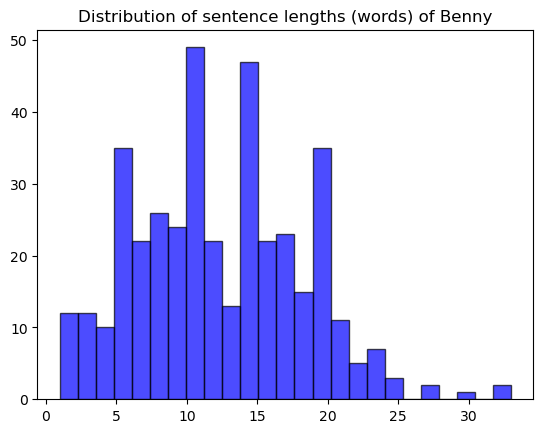

00:00:00.779 00:00:06.430 00:00:18.922
Total duration of sentences = 00:42:39.163


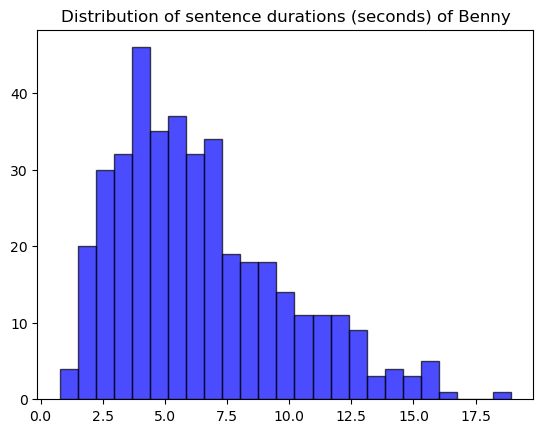

In [8]:
print(sentence_lengths.min(), sentence_lengths.mean(), sentence_lengths.max())
plt.hist(sentence_lengths, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title("Distribution of sentence lengths (words) of Benny")
plt.show()

print(seconds_to_hhmmss(min(sentence_durations)), seconds_to_hhmmss(sentence_durations.mean()), seconds_to_hhmmss(max(sentence_durations)))
print(f"Total duration of sentences = {seconds_to_hhmmss(sentence_durations.sum())}")
plt.hist(sentence_durations, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title("Distribution of sentence durations (seconds) of Benny")
plt.show()

## Benny Large

In [6]:
data_dir = "/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large"
clips_dir = os.path.join(data_dir, f"sentence_clips")

clip_files = glob.glob(os.path.join(clips_dir, "*/clips.json"))
print(f"{len(clip_files) = }")
print(f"{clip_files = }")

len(clip_files) = 21
clip_files = ['/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/gYMy4Aioa5s/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/kStURI4ULc8/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/Ovrc9mOlt2E/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/obJ9XklnwSo/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/5R1wKqS3sA8/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/W0VW5lZ8Hw4/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/hPbPzlv1ojM/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/sTGbQm6juEY/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/vcqcMYsL3P8/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sente

In [7]:
sentence_durations = []
sentence_lengths = []
sentence_texts = []

for clip_file_idx, clip_file in enumerate(clip_files):
    print(f"{clip_file = }")
    tracks_clips = json.load(open(clip_file))
    for track_clips in tracks_clips:
        for clip in track_clips['clips']:
            start_time = clip['start']
            end_time = clip['end']
            sentence = process_text(clip['sentence'])
            duration = end_time - start_time
            length = len(sentence.split(' '))
            sentence_durations.append(duration)
            sentence_lengths.append(length)
            sentence_texts.append(sentence)
    # break

sentence_durations = np.array(sentence_durations)
sentence_lengths = np.array(sentence_lengths)
print(len(sentence_durations))
print(len(sentence_lengths))

clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/gYMy4Aioa5s/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/kStURI4ULc8/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/Ovrc9mOlt2E/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/obJ9XklnwSo/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/5R1wKqS3sA8/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/W0VW5lZ8Hw4/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/hPbPzlv1ojM/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/sTGbQm6juEY/clips.json'
clip_file = '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/benny-large/sentence_clips/vcqcMYsL3P8/clips.json'
c

In [8]:
min_idx = np.where(sentence_lengths == sentence_lengths.min())
min_idx = min_idx[0]
print(min_idx)

for min_id in min_idx:
    print(f"{min_id = } | Sentence = {sentence_texts[min_id]} | duration = {sentence_durations[min_id]}")

[  11  109  171  183  188  193  218  632  663  869  973 1130 1287 1378
 1385 1405 1420 1537 1541 1572 1589 1648 1688 1702 1729 1730 1961 1965
 2071 2146 2184 2265]
min_id = 11 | Sentence = SO | duration = 1.813999999999993
min_id = 109 | Sentence = ERM | duration = 1.3669999999999618
min_id = 171 | Sentence = HERSHEY'S | duration = 1.7999999999999972
min_id = 183 | Sentence = REESE'S | duration = 1.1599999999999966
min_id = 188 | Sentence = TWIZZLERS | duration = 1.3000000000000114
min_id = 193 | Sentence = NERDS | duration = 0.8400000000000034
min_id = 218 | Sentence = NERDS | duration = 0.8799999999999955
min_id = 632 | Sentence = WOW | duration = 0.8999999999999773
min_id = 663 | Sentence = WOW | duration = 1.0600000000000165
min_id = 869 | Sentence = BYE | duration = 1.0579999999999927
min_id = 973 | Sentence = BYE | duration = 1.6200000000000045
min_id = 1130 | Sentence = OKAY | duration = 0.7530000000000143
min_id = 1287 | Sentence = BYE | duration = 1.6409999999999627
min_id = 1

1 10.861871138570168 32


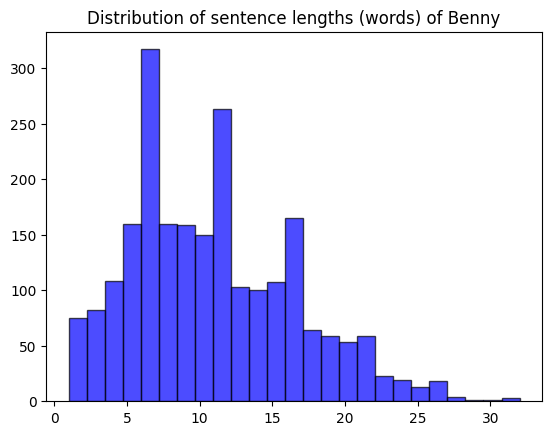

00:00:00.720 00:00:05.157 00:00:20.237
Total duration of sentences = 03:14:45.212


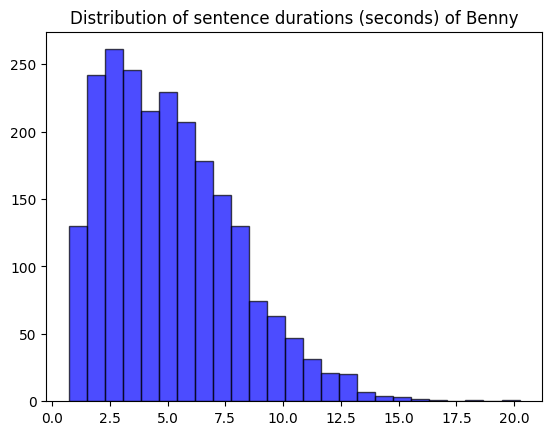

In [9]:
print(sentence_lengths.min(), sentence_lengths.mean(), sentence_lengths.max())
plt.hist(sentence_lengths, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title("Distribution of sentence lengths (words) of Benny")
plt.show()

print(seconds_to_hhmmss(min(sentence_durations)), seconds_to_hhmmss(sentence_durations.mean()), seconds_to_hhmmss(max(sentence_durations)))
print(f"Total duration of sentences = {seconds_to_hhmmss(sentence_durations.sum())}")
plt.hist(sentence_durations, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title("Distribution of sentence durations (seconds) of Benny")
plt.show()

## Deaf Speaker

In [26]:
data_dir = "/ssd_scratch/cvit/vanshg/datasets/accented_speakers"
speaker = "jack"
speaker_dir = os.path.join(data_dir, f"{speaker}")
clips_dir = os.path.join(speaker_dir, f"sentence_clips")

clip_files = glob.glob(os.path.join(clips_dir, "*/clips.json"))
clip_files = sorted(clip_files)
print(f"{len(clip_files) = }")
print(f"{clip_files = }")

speaker_df = get_speaker_df(clip_files)
speaker_df

len(clip_files) = 10
clip_files = ['/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/23su4pTJ_XY/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/426D8qmAW9U/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/4cv3lIvnpiI/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/58l9hcyGsGI/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/7XlHCoEJenE/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/ETWbMaxGmbA_000/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/ETWbMaxGmbA_001/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/ETWbMaxGmbA_002/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/JbkdvIauRYM/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clip

,video_path,video_id,status,start,end,transcript,processed_text,num_words,num_seconds
0,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,23su4pTJ_XY,None,0.1,7.9,"Hey, I want to make this really quick video b...",HEY I WANT TO MAKE THIS REALLY QUICK VIDEO BE...,34,7.8
1,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,23su4pTJ_XY,None,8.0,14.6,"In terms of production, in terms of money spen...",IN TERMS OF PRODUCTION IN TERMS OF MONEY SPENT...,21,6.6
2,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,23su4pTJ_XY,None,14.9,18.9,"It's the biggest thing that I've ever done, th...",IT'S THE BIGGEST THING THAT I'VE EVER DONE THE...,18,4.0
3,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,23su4pTJ_XY,None,19.4,21.4,So please tune in and watch it.,SO PLEASE TUNE IN AND WATCH IT,7,2.0
4,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,23su4pTJ_XY,None,21.5,35.9,"In regards to what it is, I've kind of been a...",IN REGARDS TO WHAT IT IS I'VE KIND OF BEEN AT...,63,14.4
...,...,...,...,...,...,...,...,...,...
1541,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,_0MutuU6eks,None,630.6,632.4,and we're all gonna die eventually.,AND WE'RE ALL GONNA DIE EVENTUALLY,6,1.8
1542,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,_0MutuU6eks,None,635.1,636.2,- What did you think about those searches?,WHAT DID YOU THINK ABOUT THOSE SEARCHES,8,1.1
1543,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,_0MutuU6eks,None,636.1,637.8,Were any of them a surprise to you?,WERE ANY OF THEM A SURPRISE TO YOU,8,1.7
1544,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,_0MutuU6eks,None,637.7,640.0,- A lot of them are dumber than I thought they...,A LOT OF THEM ARE DUMBER THAN I THOUGHT THEY ...,13,2.3


In [8]:
speaker_df = speaker_df[speaker_df['status'] == 'Accepted']
speaker_df

,video_path,video_id,status,start,end,transcript,processed_text,num_words,num_seconds
0,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,15b1sEDtVCs,Accepted,4.5,8.3,My glasses looks like I'm ready to learn!,MY GLASSES LOOKS LIKE I'M READY TO LEARN,8,3.8
1,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,15b1sEDtVCs,Accepted,9.1,13.0,"Actually, I know ASL abc",ACTUALLY I KNOW ASL ABC,5,3.9
2,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,15b1sEDtVCs,Accepted,13.5,19.0,"But, before when I first started learning ASL abc",BUT BEFORE WHEN I FIRST STARTED LEARNING ASL ABC,9,5.5
3,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,15b1sEDtVCs,Accepted,19.2,25.8,I realised I really struggled with how to reme...,I REALISED I REALLY STRUGGLED WITH HOW TO REME...,13,6.6
5,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,15b1sEDtVCs,Accepted,29.7,34.7,"Until my boyfriend John asked me, do you know ...",UNTIL MY BOYFRIEND JOHN ASKED ME DO YOU KNOW A...,11,5.0
...,...,...,...,...,...,...,...,...,...
2947,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,yY17oEf9e9A,Accepted,406.7,412.2,I'll be finishing this video as I'm sure it's ...,I'LL BE FINISHING THIS VIDEO AS I'M SURE IT'S ...,12,5.5
2948,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,yY17oEf9e9A,Accepted,413.3,415.4,"Ok, in my next video",OK IN MY NEXT VIDEO,5,2.1
2949,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,yY17oEf9e9A,Accepted,415.3,420.7,I will be doing my own version of silly things...,I WILL BE DOING MY OWN VERSION OF SILLY THINGS...,13,5.4
2950,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,yY17oEf9e9A,Accepted,420.4,423.9,do or say to deaf people and why,DO OR SAY TO DEAF PEOPLE AND WHY,8,3.5


In [14]:
# speaker_df[speaker_df['num_words'] == 1]
temp_df = speaker_df[speaker_df['processed_text'].str.contains('LL', case=False, na=False)]
texts = list(temp_df['processed_text'])
print(len(texts))

142


### Distribution of Sentences

Total Duration: 01:40:14.401
Durations, Min: 0.19999999999998863 | Max: 16.600000000000023 | Mean: 3.8902975420439856
Length, Min: 1 | Max: 70 | Mean: 14.696636481241915


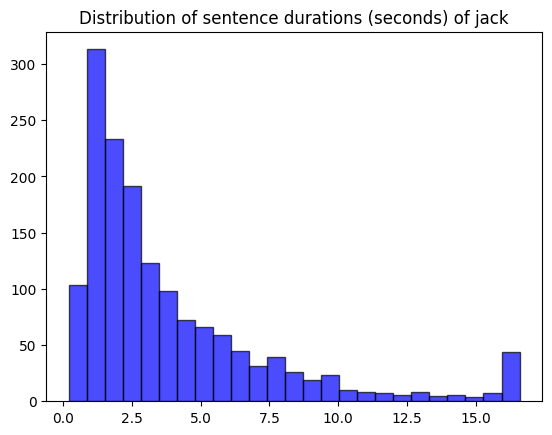

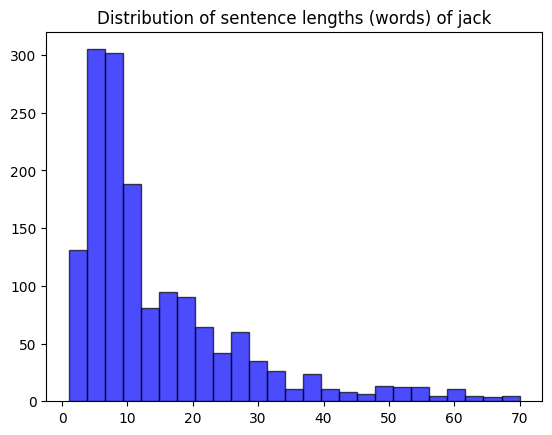

In [27]:
sentence_durations = speaker_df['num_seconds'].to_numpy()
sentence_lengths = speaker_df['num_words'].to_numpy()
print(f"Total Duration: {seconds_to_hhmmss(sentence_durations.sum())}")
print(f"Durations, Min: {sentence_durations.min()} | Max: {sentence_durations.max()} | Mean: {sentence_durations.mean()}")
print(f"Length, Min: {sentence_lengths.min()} | Max: {sentence_lengths.max()} | Mean: {sentence_lengths.mean()}")

plt.hist(sentence_durations, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of sentence durations (seconds) of {speaker}")
plt.show()

plt.hist(sentence_lengths, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of sentence lengths (words) of {speaker}")
plt.show()

vocab_size = 2227 | min_word_freq = 1 | max_word_freq = 1076


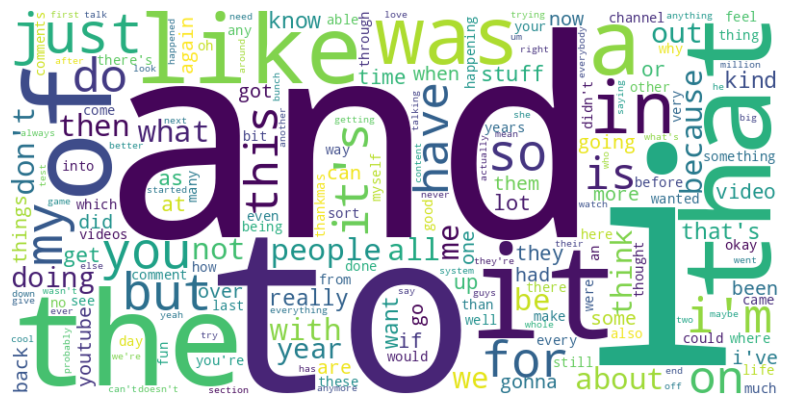

In [28]:
# Vocabulary Size and Word Cloud
sentence_texts = list(speaker_df['processed_text'])
word_freqs = get_word_frequencies(sentence_texts)

vocab_size = len(word_freqs.keys())
min_word_freq = min(word_freqs.values())
max_word_freq = max(word_freqs.values())
print(f"{vocab_size = } | {min_word_freq = } | {max_word_freq = }")

draw_word_cloud(word_freqs)

In [17]:
unique_words = sorted(word_freqs.keys())

with open(f"{speaker}_words", 'w') as file:
    for word in unique_words:
        freq = word_freqs[word]
        file.write(f"{word}, {freq}\n")

In [19]:
for word in unique_words:
    if len(word) < 3:
        print(word)

0
1
10
16
2
20
28
2d
3
30
32
34
64
95
99
a
a0
ai
am
an
as
at
b
be
by
c
d
d0
d1
dc
df
dg
dk
dl
do
ds
dw
dy
dz
et
f
g
go
h
he
i
if
ij
in
is
it
j
k
l
l1
l2
m
me
my
n
n0
n1
n2
no
of
oh
ok
on
or
p
q
s
s0
s1
s2
s3
si
so
to
uh
up
us
w
w0
w1
w2
we
wg
wk
ws
x
x1
x2
y
z
z1
z2
zf
zg
zi
zj
zk


### Analyzing errors

In [25]:
results_csvpath = "/ssd_scratch/cvit/vanshg/yann_lecun_inference/pretrained_on_train_set/lightning_logs/version_0/results/test_results_epoch0.csv"
results_df = pd.read_csv(results_csvpath)
results_df

,Index,Ground Truth Text,Predicted Text,Length,Word Distance,WER,Total Length,Total Word Distance,Final WER
0,1,OKAY QUESTION,OKAY,2,1,0.500000,76.0,19.0,0.250000
1,5,IT'S DIFFERENTIAL CALCULUS BASICALLY,IT'S DIFFERENT FROM WHAT IT IS BASICALLY,4,5,1.250000,128.0,31.0,0.242188
2,9,IT WAS A WHOLE DEBATE YOU KNOW WITHIN THE MACH...,WE'VE TOLD THEM THAT YOU KNOW THE MACHINE LEAR...,17,7,0.411765,177.0,52.0,0.293785
3,13,THERE'S VARIOUS LOSS FUNCTIONS,THERE'S LOTS OF COST FUNCTIONS,4,3,0.750000,266.0,93.0,0.349624
4,17,DZG IS A VECTOR DC OVER DZG IS A GRADIENT VECTOR,IF C IS A VECTOR C IS A GRADIENT VECTOR,11,5,0.454545,317.0,121.0,0.381703
...,...,...,...,...,...,...,...,...,...
223,208,BUT IN FACT IT GOES TO THE BOTTOM FASTER,BUT IN FACT IT GOES TO THE BOTTOM FASTER,9,0,0.000000,3199.0,1119.0,0.349797
224,212,THE AVERAGE OF THE GRADIENT,THE AVERAGE OF THE GRADIENTS,5,1,0.200000,3257.0,1131.0,0.347252
225,216,THERE IS ONE CONSTRAINT THAT WE WILL LIFT IN A...,THERE IS ONE TRAIT THAT WE LIFTED SOMETHING CA...,29,11,0.379310,3335.0,1154.0,0.346027
226,220,IF THERE ARE LOOPS THEN YOU CAN DO THAT RIGHT,YOU CAN'T DO THAT RIGHT,10,6,0.600000,3412.0,1208.0,0.354045


In [26]:
gt_sentences = list(results_df['Ground Truth Text'])
pred_sentences = list(results_df['Predicted Text'])

print(len(gt_sentences))
print(len(pred_sentences))

228
228


In [27]:
total_gt_words = sum([len(sent.split()) for sent in gt_sentences])
total_pred_words = sum([len(sent.split()) for sent in pred_sentences])
print(total_gt_words)
print(total_pred_words)

3442
3159


In [28]:
print(gt_sentences)
print(pred_sentences)

['OKAY QUESTION', "IT'S DIFFERENTIAL CALCULUS BASICALLY", 'IT WAS A WHOLE DEBATE YOU KNOW WITHIN THE MACHINE LEARNING COMMUNITY THAT LASTED 20 YEARS BASICALLY', "THERE'S VARIOUS LOSS FUNCTIONS", 'DZG IS A VECTOR DC OVER DZG IS A GRADIENT VECTOR', 'AND THE COST FUNCTION IN SUPERVISED LEARNING BUT ALSO IN SOME OTHER SETTINGS WILL BASICALLY COMPUTE THE DISCREPANCY DISTANCE DIVERGENCE WHATEVER YOU WANT TO CALL IT BETWEEN THE DESIRED OUTPUT Y', 'OR WHAT YOU CAN DO IS COMPUTE THE GRADIENT OF THE COST FUNCTION WITH RESPECT TO THE OUTPUT OF YOUR NEURAL NET', 'THOSE ASSEMBLE TO FORM MOLECULES', 'WE IMPORT TORCH', 'SO SUPERVISED LEARNING YOU COULD THINK OF IT AS KIND OF A PLAY ON SUPERVISED LEARNING', "AT THE BOTTOM IT'S ZERO", "OK SO THAT'S THE FIRST", "SO THIS WHOLE MATRIX HERE IF I TAKE THE COMPONENT IJ IT'S THE PARTIAL DERIVATIVE OF THE ITH OUTPUT OF THAT MODULE THE ITH COMPONENT OF ZG", 'AND ZF IS A COLUMN VECTOR OF SIZE DF', 'THE NICE THING ABOUT THIS FORMALISM IS THAT AS I SAID BEFORE', "

In [29]:
from analyse_utils import aggregate_errors
error_results = aggregate_errors(gt_sentences, pred_sentences)
print(error_results.keys())
print(error_results['total_words'])

dict_keys(['total_errors', 'total_words', 'wer', 'Substitutions', 'Deletions', 'Insertions'])
3442


In [30]:
print_most_frequent_errors(error_results, 30)

WER: 0.35328297501452643 | result['total_errors'] = 1216 | result['total_words'] = 3442
Most Frequent Substitutions:
'A' -> 'THE': 11 times
'YOU' -> 'TO': 6 times
'IS' -> 'IT'S': 5 times
'THE' -> 'A': 5 times
'YOUR' -> 'THE': 4 times
'IT'S' -> 'IS': 3 times
'OF' -> 'THE': 3 times
'C' -> 'Z': 3 times
'DZG' -> 'C': 2 times
'LOSS' -> 'S': 2 times
'ENTROPY' -> 'P': 2 times
'CROSS' -> 'OF': 2 times
'CAN'T' -> 'CAN': 2 times
'RULE' -> 'GENERAL': 2 times
'CHAIN' -> 'IN': 2 times
'LET'S' -> 'IT'S': 2 times
'ZG' -> 'C': 2 times
'DZ' -> 'DC': 2 times
'AND' -> 'THAT': 2 times
'WANT' -> 'WERE': 2 times
'A' -> 'IS': 2 times
'YOU' -> 'GOING': 2 times
'BY' -> 'IS': 2 times
'SOME' -> 'THE': 2 times
'HAS' -> 'THAT'S': 2 times
'TO' -> 'A': 2 times
'IS' -> 'THIS': 2 times
'AND' -> 'GRADIENT': 2 times
'W0' -> 'W': 2 times
'SEPARATION' -> 'SIMPLEST': 2 times

Most Frequent Deletions:
'OF': 18 times
'THE': 15 times
'A': 15 times
'AND': 13 times
'YOU': 12 times
'IT': 11 times
'IS': 11 times
'IN': 9 times
'SO